In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

In [6]:
dtypes_train = { 
    'timestamp' : 'int64',
    'user_id'  : 'int32',
    'content_id'  : 'int16',
    'content_type_id'  : 'int8',
    'task_container_id'  : 'int16',
    'user_answer'  : 'int8',
    'answered_correctly'  : 'int8',
    'prior_question_elapsed_time'  : 'float64',
    'prior_question_had_explanation'  : 'object'
}

In [7]:
# loading small datasets
df_l = pd.read_csv('lectures.csv')
df_q = pd.read_csv('questions.csv')

In [8]:
#loading train dataset
df_t_init = pd.read_csv('train.csv',usecols=dtypes_train.keys())
df_t_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int64  
 2   content_id                      int64  
 3   content_type_id                 int64  
 4   task_container_id               int64  
 5   user_answer                     int64  
 6   answered_correctly              int64  
 7   prior_question_elapsed_time     float64
 8   prior_question_had_explanation  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 6.8+ GB


In [9]:
#reducing dataset size to speed-up the calculations
df_t_init = df_t_init.sample(frac=0.2)

In [10]:
#change dtypes

df_t = None
df_t = pd.DataFrame()
for col, dt in dtypes_train.items():
    df_t[col] = df_t_init[col].astype(dt)

display(df_t.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20246066 entries, 66250755 to 81092561
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float64
 8   prior_question_had_explanation  object 
dtypes: float64(1), int16(2), int32(1), int64(1), int8(3), object(1)
memory usage: 830.3+ MB


None

In [11]:
# change timestamp into days
df_t['timestamp'] = df_t['timestamp']/1000/3600/24

In [12]:
#release df_t_init from memory
df_t_init = None

# Research the components of datasets individually

## TRAIN dataset

In [13]:
df_t.describe()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,2.024607e+07,2.024607e+07,2.024607e+07,2.024607e+07,2.024607e+07,2.024607e+07,2.024607e+07,1.977568e+07
mean,8.917596e+01,1.076549e+09,5.219911e+03,1.935369e-02,9.042796e+02,1.376595e+00,6.252590e-01,2.542767e+04
std,1.342077e+02,6.197349e+08,3.868222e+03,1.377647e-01,1.358652e+03,1.193050e+00,5.225108e-01,1.996919e+04
min,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,6.067934e+00,5.406009e+08,2.063000e+03,0.000000e+00,1.050000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,3.095570e+01,1.071654e+09,5.025000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,1.148806e+02,1.615726e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.011872e+03,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


### timestamp

<AxesSubplot:>

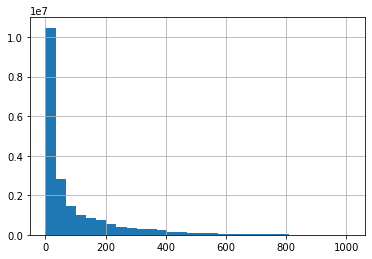

In [14]:
#timestamp: (int64) the time in days between this user interaction and the first event completion from that user.
df_t['timestamp'].hist(bins=30)

<AxesSubplot:xlabel='timestamp'>

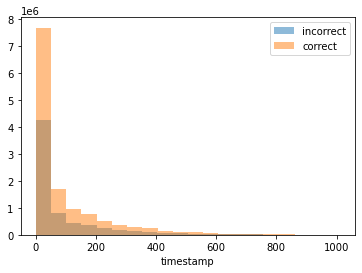

In [15]:
#impact of timestamp
x = df_t[df_t['answered_correctly'] == 0]['timestamp'] #incorrect answers
y = df_t[df_t['answered_correctly'] == 1]['timestamp'] #correct answers
fig, ax = plt.subplots()


ax.hist(x,alpha=0.5,bins = 20, label = 'incorrect')
ax.hist(y,alpha=0.5,bins = 20,label = 'correct')
plt.legend(loc='upper right')
ax.set_xlabel('timestamp')

ax

In [63]:
#How timestamp differs for questions and lectures
x = df_t[df_t['content_type_id'] == 0][['timestamp']] #questions
y = df_t[df_t['content_type_id'] == 1][['timestamp']] #lectures

fig, ax = plt.subplots()


ax.hist(x,alpha=0.5,bins = 20, label = 'questions', density=True)
ax.hist(y,alpha=0.5,bins = 20,label = 'lectures', density=True)
plt.legend(loc='upper right')
ax.set_xlabel('timestamp')

plt.show()
display(x.describe())
display(y.describe())


TypeError: 'NoneType' object is not subscriptable

### user_id & user_answer & answered_correctly

In [18]:
#user_id
# 332794 unique users (6.6 % of the dataset)
display(332794/5.061517e+06)
display(df_t.nunique()['user_id'])

0.06574985325545682

390882

In [19]:
#estimate average 
users = df_t[df_t['content_type_id'] == 0][['user_id', 'answered_correctly']].groupby(['user_id']).agg(['count', 'mean'])

<AxesSubplot:>

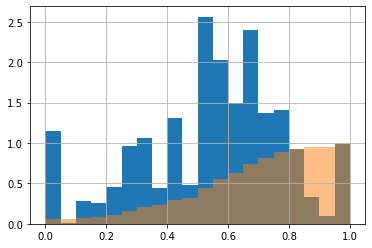

In [20]:
users['answered_correctly']['mean'].hist(bins=20,density=True,cumulative=False)
users['answered_correctly']['mean'].hist(bins=20,density=True,cumulative=True,alpha=0.5)

### content_type_id

In [21]:
df_t['content_type_id'].value_counts()
#most of the dataset are questions

0    19854230
1      391836
Name: content_type_id, dtype: int64

### task_container_id

In [22]:
#research what task_container id does
containers = df_t[['task_container_id', 'content_id', 'timestamp']].groupby(['task_container_id']).agg(['count', 'min', 'max'])

In [23]:
containers

content_id              timestamp                \
                       count   min    max     count           min   
task_container_id                                                   
0                      79222     2  32625     79222  0.000000e+00   
1                      79374     0  32312     79374  0.000000e+00   
2                      78984     0  30943     78984  0.000000e+00   
3                      79297     0  32625     79297  0.000000e+00   
4                     137632     0  29695    137632  0.000000e+00   
...                      ...   ...    ...       ...           ...   
9995                      33    59  12392        33  5.608203e+09   
9996                      27   108  20474        27  5.608221e+09   
9997                      35  1016  13499        35  3.273919e+09   
9998                      35   322  12281        35  2.974767e+09   
9999                      36    59  13292        36  2.974778e+09   

                                 
                            max  
task_container_id                
0                  4.571133e+10  
1                  6.070127e+10  
2                  7.026131e+10  
3                  7.026148e+10  
4                  6.574214e+10  
...                         ...  
9995               6.406766e+10  
9996               5.552859e+10  
9997               6.875456e+10  
9998               6.875467e+10  
9999               7.392819e+10  

[10000 rows x 6 columns]

In [24]:
containers['content_id']['count'].value_counts()

51      80
47      74
58      68
46      68
40      68
        ..
4247     1
4240     1
4281     1
4179     1
21       1
Name: count, Length: 3114, dtype: int64

Containers contain from 200 to 1 questions/lectures

### prior_question_elapsed_time

<AxesSubplot:>

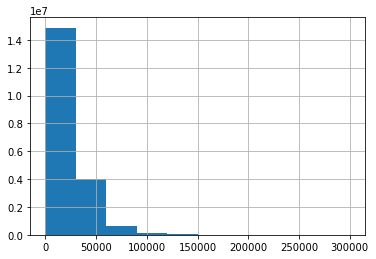

In [25]:
df_t['prior_question_elapsed_time'].hist()

In [26]:
#research elapsed time for questions. Check that mean and max are the same
users_elapsed_time = df_t[df_t['content_type_id'] == 0][['user_id', 'answered_correctly','prior_question_elapsed_time','task_container_id']].groupby(['user_id', 'task_container_id']).agg(['count', 'mean', 'max'])
users_elapsed_time

answered_correctly           \
                                          count mean max   
user_id    task_container_id                               
115        2                                  1  1.0   1   
           4                                  1  1.0   1   
           16                                 1  1.0   1   
           17                                 1  0.0   0   
           31                                 1  0.0   0   
...                                         ...  ...  ..   
2147482888 4                                  1  1.0   1   
           5                                  1  1.0   1   
           10                                 1  1.0   1   
           17                                 1  0.0   0   
           23                                 1  1.0   1   

                             prior_question_elapsed_time                    
                                                   count     mean      max  
user_id    task_container_id                                                
115        2                                           1  37000.0  37000.0  
           4                                           1  11000.0  11000.0  
           16                                          1  21000.0  21000.0  
           17                                          1  20000.0  20000.0  
           31                                          1  15000.0  15000.0  
...                                                  ...      ...      ...  
2147482888 4                                           1  21000.0  21000.0  
           5                                           1  16000.0  16000.0  
           10                                          1  18000.0  18000.0  
           17                                          1  30000.0  30000.0  
           23                                          1  14000.0  14000.0  

[18393655 rows x 6 columns]

<AxesSubplot:>

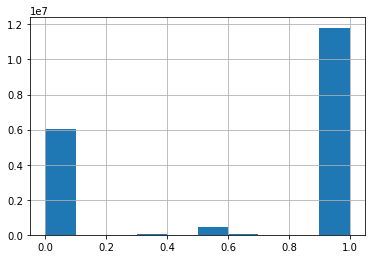

In [27]:
#distribution of marks for bundles of questions
users_elapsed_time['answered_correctly']['mean'].hist()

<AxesSubplot:>

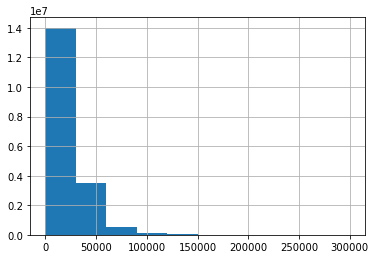

In [28]:
users_elapsed_time['prior_question_elapsed_time']['mean'].hist()

In [29]:
#group elapsed time in bins
users_elapsed_time['answer_cat'] = pd.cut(users_elapsed_time['answered_correctly']['mean'],bins = [0,0.2,0.4,0.6,0.8,1.0])
users_elapsed_time['answer_cat'].value_counts()

(0.8, 1.0]    11811462
(0.4, 0.6]      431249
(0.6, 0.8]       57898
(0.2, 0.4]       32915
(0.0, 0.2]          10
Name: answer_cat, dtype: int64

<AxesSubplot:xlabel='answer_cat', ylabel='mean'>

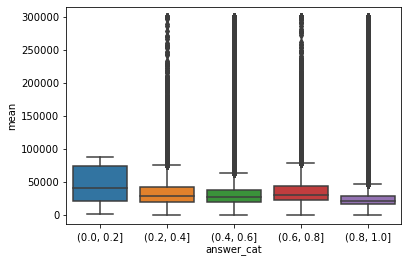

In [30]:
#dependence of marks upon elapsed time for previous batch
sns.boxplot(x = users_elapsed_time['answer_cat'], y = users_elapsed_time['prior_question_elapsed_time']['mean'])

In [31]:
users_elapsed_time.groupby(['answer_cat']).agg('mean')

answered_correctly                prior_question_elapsed_time  \
                        count      mean  max                       count   
answer_cat                                                                 
(0.0, 0.2]           5.000000  0.200000  1.0                    5.000000   
(0.2, 0.4]           3.034088  0.330712  1.0                    3.034088   
(0.4, 0.6]           2.009387  0.500010  1.0                    2.009387   
(0.6, 0.8]           3.052023  0.670973  1.0                    3.052023   
(0.8, 1.0]           1.055400  1.000000  1.0                    1.050893   

                                        
                    mean           max  
answer_cat                              
(0.0, 0.2]  43713.300000  43713.300000  
(0.2, 0.4]  33606.525323  33606.525323  
(0.4, 0.6]  31187.498740  31187.498740  
(0.6, 0.8]  35511.615496  35511.615496  
(0.8, 1.0]  24597.967921  24597.967921

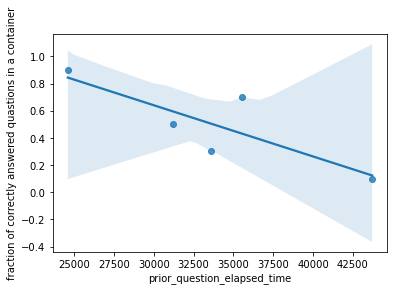

array([[ 1.        , -0.82747732],
       [-0.82747732,  1.        ]])

In [32]:
#dependence of marks upon elapsed time for previous batch
x = users_elapsed_time.groupby(['answer_cat']).agg('mean')['prior_question_elapsed_time']['mean']
y = [0.1, 0.3, 0.5, 0.7, 0.9]

sns.regplot(x = x,y = y)

plt.ylabel('fraction of correctly answered quastions in a container')
plt.xlabel('prior_question_elapsed_time')

plt.show()

np.corrcoef(x,y)

### prior question had explanations

In [33]:
#influence of the presence of explanatinos for the previous question
prior_question_had_expl = pd.DataFrame()
prior_question_had_expl['explanation'] = df_t[df_t['prior_question_had_explanation'] == True]['answered_correctly'].value_counts()
prior_question_had_expl['no_explanation'] =df_t[df_t['prior_question_had_explanation'] == False]['answered_correctly'].value_counts()
prior_question_had_expl.loc['fraction_of_correct_answers'] = prior_question_had_expl.loc[1] / (prior_question_had_expl.loc[0]+ prior_question_had_expl.loc[1])
prior_question_had_expl

,explanation,no_explanation
1,1.207686e+07,920782.000000
0,5.861616e+06,916423.000000
fraction_of_correct_answers,6.732377e-01,0.501186


If prior questoin has explanation the probability of correct answer increases by 17 percentage points

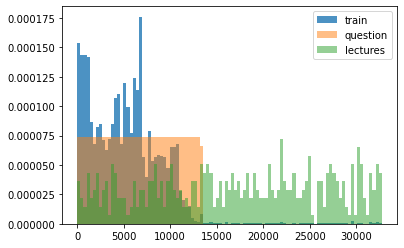

In [34]:
#check how content id is distributed
x = df_t['content_id']
y = df_q['question_id']
z=df_l['lecture_id']

bins = np.linspace(min(x.values),max(x.values),100)

plt.hist(x,bins,label='train',alpha=0.8,density=True)
plt.hist(y,bins,label='question',alpha=0.5,density=True)
plt.hist(z,bins,label='lectures',alpha=0.5,density=True)
plt.legend(loc='upper right')

plt.show()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>Preliminary analysis results of TRAIN dataset</u></b>
</font>
<font color='green'>
<br>1) There is a negative correlation between prior question elapsed time and fraction of correctly answered questions in a batch. In simpler terms: students with good grades tend to solve exam questions faster.
<br>2) If prior questoin has explanation the probability of correct answer increases by 17 percentage points

## Lectures dataset

In [35]:
df_l.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [36]:
df_l.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [37]:
df_l.nunique()

lecture_id    418
tag           151
part            7
type_of         4
dtype: int64

<AxesSubplot:>

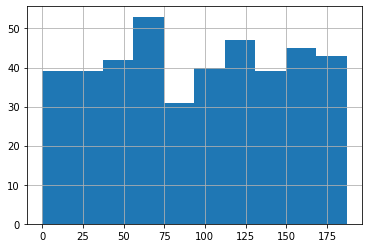

In [38]:
df_l['tag'].hist()

In [39]:
df_l['type_of'].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

## Questions dataset

In [40]:
df_q.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


## Combine datasets

In [41]:
#add tags ti questions in TRAIN dataset
df_comb_q = pd.merge(df_t[df_t['content_type_id'] == 0], df_q[['question_id','tags']], left_on = 'content_id', right_on='question_id')
df_comb_q.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,tags
0,4.770174e+08,1408097183,538,0,114,0,0,16000.0,True,538,155 163 162 38 102
1,2.097195e+08,773759903,538,0,16,1,1,25000.0,True,538,155 163 162 38 102
2,4.857060e+05,114747363,538,0,15,0,0,17000.0,True,538,155 163 162 38 102
3,3.569634e+09,173575272,538,0,408,1,1,19000.0,True,538,155 163 162 38 102
4,3.561762e+08,1792890814,538,0,103,1,1,28000.0,True,538,155 163 162 38 102


In [42]:
df_comb_q.describe()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,question_id
count,1.985423e+07,1.985423e+07,1.985423e+07,19854230.0,1.985423e+07,1.985423e+07,1.985423e+07,1.977568e+07,1.985423e+07
mean,7.702931e+09,1.076575e+09,4.994093e+03,0.0,9.080466e+02,1.423498e+00,6.573345e-01,2.542767e+04,4.994093e+03
std,1.159737e+10,6.197160e+08,3.289230e+03,0.0,1.365336e+03,1.156628e+00,4.746008e-01,1.996919e+04,3.289230e+03
min,0.000000e+00,1.150000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.194438e+08,5.406257e+08,2.015000e+03,0.0,1.030000e+02,0.000000e+00,0.000000e+00,1.600000e+04,2.015000e+03
50%,2.670080e+09,1.071654e+09,4.984000e+03,0.0,3.810000e+02,1.000000e+00,1.000000e+00,2.100000e+04,4.984000e+03
75%,9.929923e+09,1.615726e+09,7.219000e+03,0.0,1.099000e+03,3.000000e+00,1.000000e+00,2.966600e+04,7.219000e+03
max,8.742577e+10,2.147483e+09,1.352200e+04,0.0,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05,1.352200e+04


In [43]:
tags_ds = df_comb_q[['tags', 'answered_correctly']].groupby('tags').agg('mean')
tags_ds

,answered_correctly
tags,
1,0.607148
1 162,0.625146
10 111 92,0.822785
10 164 102,0.759747
10 164 162 29,0.876377
...,...
98 97 21,0.717630
98 97 35 117 122 162,0.718635
98 97 35 146 122,0.719451


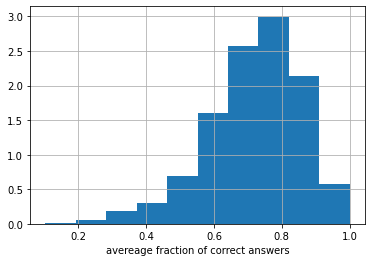

In [44]:
#distribution of correct answers by tags
tags_ds['answered_correctly'].hist(density=True)

plt.xlabel('avereage fraction of correct answers')
plt.show()

In [45]:
df_comb_q.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,tags
0,4.770174e+08,1408097183,538,0,114,0,0,16000.0,True,538,155 163 162 38 102
1,2.097195e+08,773759903,538,0,16,1,1,25000.0,True,538,155 163 162 38 102
2,4.857060e+05,114747363,538,0,15,0,0,17000.0,True,538,155 163 162 38 102
3,3.569634e+09,173575272,538,0,408,1,1,19000.0,True,538,155 163 162 38 102
4,3.561762e+08,1792890814,538,0,103,1,1,28000.0,True,538,155 163 162 38 102


In [46]:
df_l.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [47]:
#merge train and lectures dataset
df_comb_l = pd.merge(df_t[df_t['content_type_id'] == 1][['user_id',	'content_id',	'content_type_id',	'task_container_id']], df_l, left_on = 'content_id', right_on = 'lecture_id')
df_comb_l.head()

,user_id,content_id,content_type_id,task_container_id,lecture_id,tag,part,type_of
0,837897537,10540,1,281,10540,99,1,concept
1,1663773596,10540,1,70,10540,99,1,concept
2,1534072763,10540,1,569,10540,99,1,concept
3,1981195387,10540,1,48,10540,99,1,concept
4,1114594931,10540,1,50,10540,99,1,concept


In [48]:
display(df_comb_l.describe())
df_comb_l.nunique()

,user_id,content_id,content_type_id,task_container_id,lecture_id,tag,part
count,3.918360e+05,391836.00000,391836.0,391836.000000,391836.00000,391836.000000,391836.000000
mean,1.075247e+09,16662.04518,1.0,713.407012,16662.04518,91.132795,4.082004
std,6.206949e+08,9562.31120,0.0,941.388580,9562.31120,54.389710,1.673603
min,5.382000e+03,89.00000,1.0,0.000000,89.00000,0.000000,1.000000
25%,5.387435e+08,8411.00000,1.0,163.000000,8411.00000,47.000000,2.000000
50%,1.070882e+09,16218.00000,1.0,394.000000,16218.00000,85.000000,5.000000
75%,1.616934e+09,24985.00000,1.0,886.000000,24985.00000,139.000000,5.000000
max,2.147482e+09,32736.00000,1.0,9996.000000,32736.00000,187.000000,7.000000


user_id              89904
content_id             410
content_type_id          1
task_container_id     7081
lecture_id             410
tag                    151
part                     7
type_of                  4
dtype: int64

In [49]:
#group lectures by users (all lectures attended by a user)
df_comb_l_users = df_comb_l[['user_id', 'tag','part','type_of']].groupby(['user_id']).agg(set)

In [50]:
df_comb_l_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89904 entries, 5382 to 2147482216
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tag      89904 non-null  object
 1   part     89904 non-null  object
 2   type_of  89904 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [51]:
df_comb_l_users.head()

,tag,part,type_of
user_id,,,
5382,{40},{1},{concept}
8623,"{99, 30}","{1, 2}",{concept}
12741,"{161, 39}","{4, 7}",{concept}
13134,"{62, 119}",{2},"{intention, concept}"
24418,"{1, 136, 8, 141, 142, 15, 26, 27, 156, 161, 16...","{1, 2, 3, 4, 5, 6}","{solving question, intention, concept}"


In [52]:
#add lectures info to train)questions dataset
df_comb = pd.merge(df_comb_q,df_comb_l_users,how='left',on='user_id')
df_comb.rename(columns = {'tag':'tag_lectures'}, inplace = True)
df_comb.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,tags,tag_lectures,part,type_of
0,4.770174e+08,1408097183,538,0,114,0,0,16000.0,True,538,155 163 162 38 102,"{62, 55}","{2, 5}","{intention, concept}"
1,2.097195e+08,773759903,538,0,16,1,1,25000.0,True,538,155 163 162 38 102,{163},{2},{solving question}
2,4.857060e+05,114747363,538,0,15,0,0,17000.0,True,538,155 163 162 38 102,NaN,NaN,NaN
3,3.569634e+09,173575272,538,0,408,1,1,19000.0,True,538,155 163 162 38 102,"{128, 4, 134, 8, 151, 28, 156, 159, 34, 43, 17...","{1, 2, 5}","{solving question, concept}"
4,3.561762e+08,1792890814,538,0,103,1,1,28000.0,True,538,155 163 162 38 102,NaN,NaN,NaN


In [53]:
display(df_comb.info())
df_comb.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19854230 entries, 0 to 19854229
Data columns (total 14 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       float64
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float64
 8   prior_question_had_explanation  object 
 9   question_id                     int64  
 10  tags                            object 
 11  tag_lectures                    object 
 12  part                            object 
 13  type_of                         object 
dtypes: float64(2), int16(2), int32(1), int64(1), int8(3), object(5)
memory usage: 1.5+ GB


None

timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time         78554
prior_question_had_explanation      78554
question_id                             0
tags                                    0
tag_lectures                      4575843
part                              4575843
type_of                           4575843
dtype: int64

In [54]:
#free up memory
df_comb_l = None
df_comb_q = None
df_comb_l_users = None
df_t = None

In [55]:
#convert 'tags' to set
df_comb['tags'] = df_comb['tags'].apply(lambda x: [int(y) for y in x.split()]).apply(set)
df_comb.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,tags,tag_lectures,part,type_of
0,4.770174e+08,1408097183,538,0,114,0,0,16000.0,True,538,"{162, 163, 102, 38, 155}","{62, 55}","{2, 5}","{intention, concept}"
1,2.097195e+08,773759903,538,0,16,1,1,25000.0,True,538,"{162, 163, 102, 38, 155}",{163},{2},{solving question}
2,4.857060e+05,114747363,538,0,15,0,0,17000.0,True,538,"{162, 163, 102, 38, 155}",NaN,NaN,NaN
3,3.569634e+09,173575272,538,0,408,1,1,19000.0,True,538,"{162, 163, 102, 38, 155}","{128, 4, 134, 8, 151, 28, 156, 159, 34, 43, 17...","{1, 2, 5}","{solving question, concept}"
4,3.561762e+08,1792890814,538,0,103,1,1,28000.0,True,538,"{162, 163, 102, 38, 155}",NaN,NaN,NaN


In [56]:
#clear columns from nan
df_comb['tag_lectures'] = df_comb['tag_lectures'].apply(lambda x: set() if x is np.nan else x)
df_comb['tags'] = df_comb['tags'].apply(lambda x: set() if x is np.nan else x)
df_comb.head(10)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,tags,tag_lectures,part,type_of
0,4.770174e+08,1408097183,538,0,114,0,0,16000.0,True,538,"{162, 163, 102, 38, 155}","{62, 55}","{2, 5}","{intention, concept}"
1,2.097195e+08,773759903,538,0,16,1,1,25000.0,True,538,"{162, 163, 102, 38, 155}",{163},{2},{solving question}
2,4.857060e+05,114747363,538,0,15,0,0,17000.0,True,538,"{162, 163, 102, 38, 155}",{},NaN,NaN
3,3.569634e+09,173575272,538,0,408,1,1,19000.0,True,538,"{162, 163, 102, 38, 155}","{128, 4, 134, 8, 151, 28, 156, 159, 34, 43, 17...","{1, 2, 5}","{solving question, concept}"
4,3.561762e+08,1792890814,538,0,103,1,1,28000.0,True,538,"{162, 163, 102, 38, 155}",{},NaN,NaN
5,3.317856e+10,1308883299,538,0,315,1,1,19000.0,True,538,"{162, 163, 102, 38, 155}",{161},{4},"{solving question, concept}"
6,7.249839e+09,1096434796,538,0,67,1,1,18000.0,True,538,"{162, 163, 102, 38, 155}",{},NaN,NaN
7,2.460347e+09,1664841370,538,0,35,0,0,8000.0,True,538,"{162, 163, 102, 38, 155}",{},NaN,NaN
8,9.462745e+08,1819405999,538,0,20,1,1,17000.0,True,538,"{162, 163, 102, 38, 155}",{},NaN,NaN
9,3.253901e+06,1832714125,538,0,11,3,0,20000.0,True,538,"{162, 163, 102, 38, 155}","{1, 7, 136, 147, 27, 28, 161, 49, 179, 180, 53...","{1, 3, 4, 5, 6}","{solving question, concept}"


In [57]:
# df_comb['lectures_question_intersect'] = df_comb['tags'] & df_comb['tag_lectures']
# df_comb['lectures_question_intersect'] = df_comb.apply(lambda x: x['tags'].intersection(x['tag_lectures']))
df_comb['lectures_question_intersect'] = [len(frozenset(a).intersection(b))/len(a) for a,b in zip(df_comb.tags,df_comb.tag_lectures)]
display(df_comb['lectures_question_intersect'].value_counts())

0.000000    17524158
1.000000     1019669
0.333333      579551
0.250000      317103
0.200000      242630
0.500000      100118
0.400000       30280
0.166667       26819
0.666667       13562
0.600000         340
Name: lectures_question_intersect, dtype: int64

In [58]:
#check for the data consistency
df_comb[df_comb['lectures_question_intersect'] > 0]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,tags,tag_lectures,part,type_of,lectures_question_intersect
1,2.097195e+08,773759903,538,0,16,1,1,25000.0,True,538,"{162, 163, 102, 38, 155}",{163},{2},{solving question},0.200000
10,7.533750e+05,1016744733,538,0,10,0,0,19000.0,False,538,"{162, 163, 102, 38, 155}",{163},{2},{solving question},0.200000
25,7.699357e+09,1872691174,538,0,1399,3,0,1000.0,True,538,"{162, 163, 102, 38, 155}","{129, 163, 69, 105, 176, 114, 119, 30}",{2},"{solving question, concept, intention}",0.200000
29,2.562874e+09,1057522456,538,0,244,1,1,15000.0,True,538,"{162, 163, 102, 38, 155}","{163, 61}","{1, 2}","{solving question, concept}",0.200000
35,3.201566e+09,169440707,538,0,1172,3,0,18000.0,True,538,"{162, 163, 102, 38, 155}","{6, 140, 12, 20, 161, 163, 175, 47, 181, 55, 5...","{2, 3, 4, 5, 6}","{intention, concept, solving question}",0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19854165,1.515970e+10,1109748920,13164,0,4714,0,0,24667.0,True,13164,"{136, 169, 92}","{128, 132, 4, 134, 8, 136, 140, 12, 141, 15, 1...","{1, 2, 3, 4, 5, 6, 7}","{solving question, intention, concept}",0.333333
19854167,2.830098e+09,30954705,13164,0,1040,1,1,24666.0,True,13164,"{136, 169, 92}","{163, 164, 71, 136, 108, 116, 23, 187, 159}","{1, 2, 4, 5}","{solving question, concept}",0.333333
19854171,1.627870e+10,1892339121,13164,0,5356,1,1,4000.0,True,13164,"{136, 169, 92}","{0, 5, 133, 136, 8, 14, 15, 144, 19, 150, 151,...","{1, 3, 4, 5, 6, 7}","{solving question, concept}",0.666667
19854175,8.015881e+10,530563603,13164,0,3158,1,1,23000.0,True,13164,"{136, 169, 92}","{1, 132, 133, 134, 7, 136, 9, 13, 15, 152, 27,...","{1, 2, 3, 5, 6}","{intention, concept, solving question}",0.333333


In [59]:
#Try to find relationship between the fraction of tags that were given on lectures and the fraction of correct answers
answers_lectures = df_comb[['lectures_question_intersect','answered_correctly']].groupby('lectures_question_intersect').agg(['mean', 'count'])
answers_lectures


answered_correctly          
                                          mean     count
lectures_question_intersect                             
0.000000                              0.657640  17524158
0.166667                              0.760580     26819
0.200000                              0.692598    242630
0.250000                              0.672444    317103
0.333333                              0.688971    579551
0.400000                              0.695773     30280
0.500000                              0.674644    100118
0.600000                              0.697059       340
0.666667                              0.648061     13562
1.000000                              0.615571   1019669

<AxesSubplot:xlabel='lectures_question_intersect', ylabel='mean'>

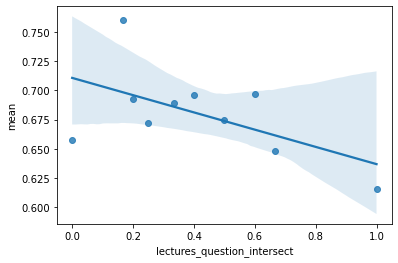

In [61]:
sns.regplot(x = answers_lectures.index, y = answers_lectures['answered_correctly']['mean'])

Number of given lectures does not correlate with the number of correct answers. Could be due to the timing of lectures. Must be further investgated.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>End analysis results of TRAIN, QUESTIONS, LECTURES dataset</u></b>
</font>
<font color='green'>
<br>1) There is a negative correlation between prior question elapsed time and fraction of correctly answered questions in a batch. In simpler terms: students with good grades tend to solve exam questions faster.
<br>2) If prior questoin has explanation the probability of correct answer increases by 17 percentage points
<br>3) No additional relationships between the data were found